In [1]:
# Import Libraries 
from plantcv import plantcv as pcv
import matplotlib

In [2]:
class options:
    def __init__(self):
        self.image = "./fotos/celulas.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

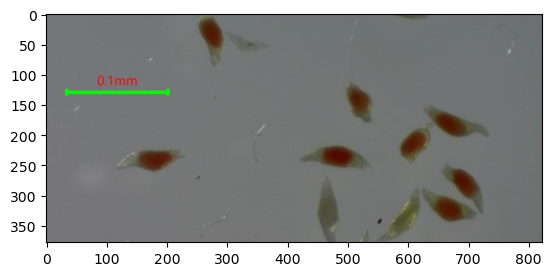

(378, 823, 3)


In [3]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)
print(img.shape)

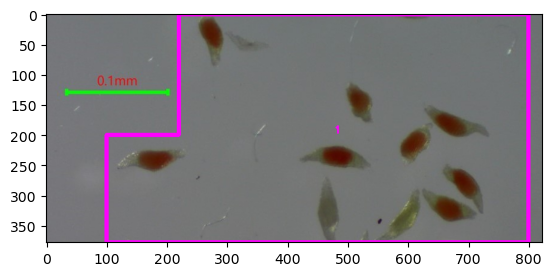

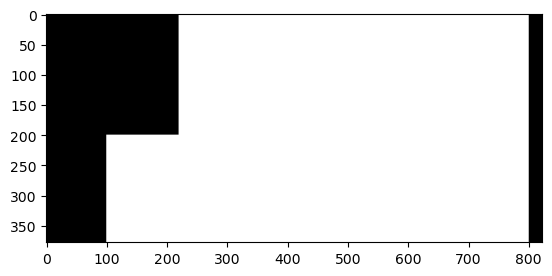

In [5]:
### Make a custom polygon ROI
roi_contour= pcv.roi.custom(img=img, 
                                            vertices=[[220,0], [800,0], 
                                            [800,378], [100,378], 
                                            [100,200], [220,200]])

# Convert the ROI contour into a binary mask
mask = pcv.roi.roi2mask(img=img, roi=roi_contour)


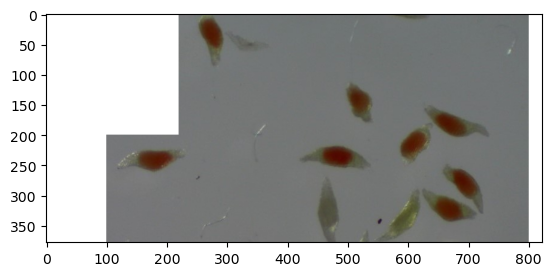

In [6]:
# Apply binary 'white' mask over an image. 
masked_image = pcv.apply_mask(img=img, mask=mask, mask_color='white')

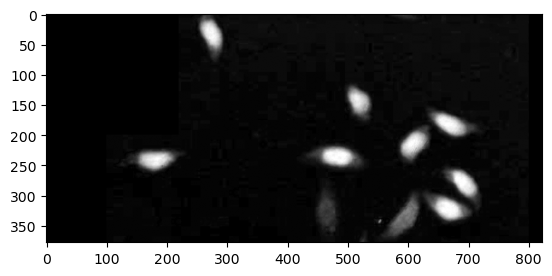

In [7]:
# Convert RGB to HSV and extract the saturation channel

# Inputs:
#   rgb_image - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=masked_image, channel='s')

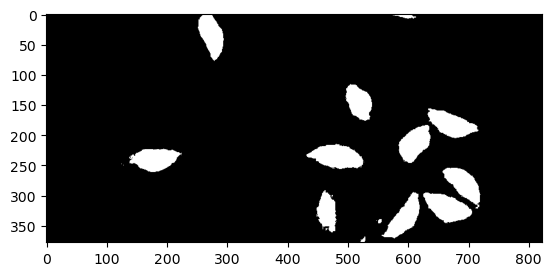

In [8]:
# Take a binary threshold to separate plant from background. 
# Threshold can be on either light or dark objects in the image. 

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   object_type - 'light' (default) or 'dark'. If the object is lighter than 
#                 the background then standard threshold is done. If the object 
#                 is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=s, threshold=30, object_type='light')

Using multiple colorspace channels can lead to better descrimination between plant and the background in an image.